In [ ]:
# Импорт модулей
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch

In [ ]:
# Подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Переходим в папку YOLO куда будем копировать данные с гитхаба
%cd drive/MyDrive/Colab Notebooks/itmo/YOLO

# Копируем данные с гитхаба 
!git clone https://github.com/ultralytics/yolov5

# После копирования переходим в папку yolov5 и ставим список библиотек из файла
%cd yolov5
%pip install -qr requirements.txt

In [ ]:
# Ставим библиотеку для визуализации обучения модели
!pip install wandb

import wandb
wandb.login(anonymous='must')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 31.5 MB/s 
     |████████████████████████████████| 158 kB 74.0 MB/s 
     |████████████████████████████████| 181 kB 74.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 157 kB 76.8 MB/s 
     |████████████████████████████████| 157 kB 80.1 MB/s 
     |████████████████████████████████| 157 kB 78.8 MB/s 
     |████████████████████████████████| 157 kB 75.9 MB/s 
     |████████████████████████████████| 157 kB 78.3 MB/s 
     |████████████████████████████████| 157 kB 81.1 MB/s 
     |████████████████████████████████| 157 kB 79.5 MB/s 
     |████████████████████████████████| 156 kB 79.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=4220c361f82f2c74cd2a2d9b0bab43ca3e81a3ba43a1555e59b0266f5202d08c
  Stored in directory: /root/.cache/pip/wheels/3e/31

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/itmo/YOLO/yolov5

/content/drive/MyDrive/Colab Notebooks/itmo/YOLO/yolov5


In [ ]:
# Задаём параметры обучения модели. Размер картинок 640 на 640 (такой размер фото в датасете).
# Батчсайз 10, количество эпох 10.
# Путь к yaml файлу где указано количество классов и пути к папкам с картинками
# Стартовые веса (маленькая/средняя/большая модель)

!python train.py --img 640\
--batch 10\
--epochs 10\
--data '/content/drive/MyDrive/Colab Notebooks/itmo/data.yaml'\
--weights yolov5m6.pt

wandb: Currently logged in as: anony-moose-405091. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/itmo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2022-9-22 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

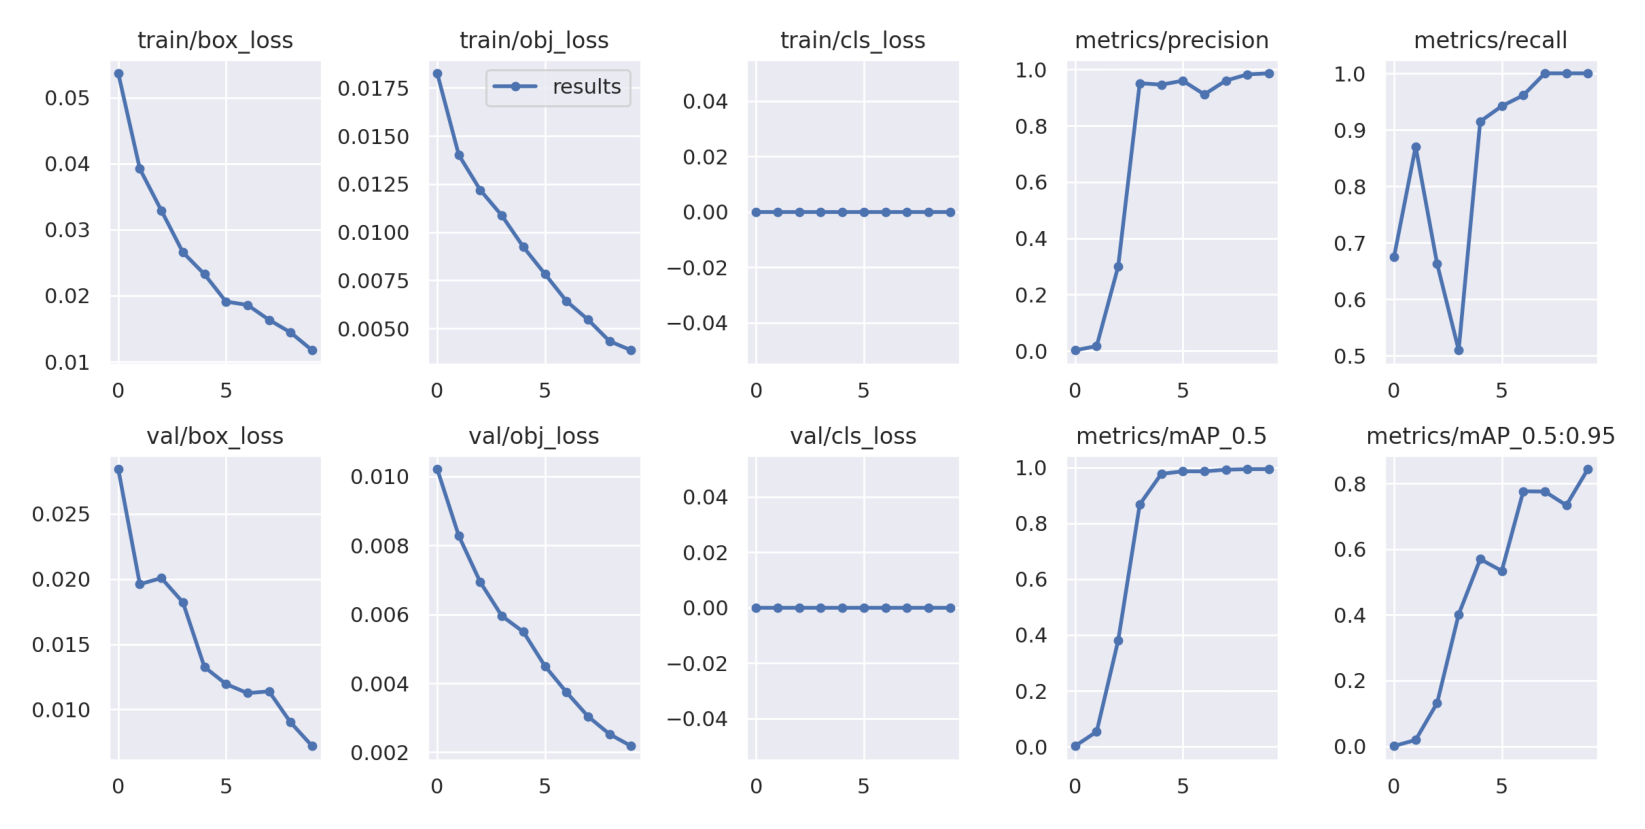

In [ ]:
# Выведем графики обучения модели (укажем путь к картинке в которую сохраняется результат)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/itmo/YOLO/yolov5/runs/train/exp4/results.png'))

In [ ]:
# Метрики Precision и Recall на графике после 5 эпох приближаются к 1. Графики лоссов выглядят так, будто могут снизиться ещё. 
# Путь куда сохранялись веса дообученной модели 
# Путь к папке с файлами yolo
model_path = '/content/drive/MyDrive/Colab Notebooks/itmo/YOLO/yolov5/runs/train/exp4/weights/best.pt'
yolo_path = '/content/drive/MyDrive/Colab Notebooks/itmo/YOLO/yolov5'

# Загрузка модели из торч хаб и загрузка в неё ранее сохранённых весов
model = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')

# Путь к тестовой картинке
img_path = '/content/drive/MyDrive/Colab Notebooks/itmo/test/images/2022-09-08T16_28_44-099216_png.rf.89af382ff3300ec4a06efb6ce90419c7.jpg'
results = model([img_path])


In [ ]:
print(results)

image 1/1: 640x640 1 License-plate
Speed: 2758.8ms pre-process, 33.2ms inference, 2.4ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
# На тестовой картинке модель видит гос номер (1 License-plate).
# Для большей наглядности в другом ноутбуке подключим к модели видеофайл и сохраним отрисовынную рамку с номером в другой видео файл. 